# **Predicción de usuarios del Sofi (BOT) que solicitarán atención humana**

*Juan Esteban Ramírez Duran*

----


## Descripción del Problema

El Bot de la Universidad ICESI es una herramienta de soporte automatizada diseñada para reducir la cantidad de consultas que requieren la intervención de un agente humano. Su objetivo es proporcionar respuestas rápidas y eficientes a preguntas frecuentes de estudiantes, docentes y personal administrativo. Sin embargo, no todas las consultas pueden resolverse a través del bot, y un porcentaje de usuarios termina solicitando asistencia humana, lo que genera carga adicional en los agentes de soporte.

Actualmente, no se cuenta con un mecanismo que permita predecir cuántos usuarios requerirán atención humana, lo que puede ocasionar falta de personal disponible en momentos de alta demanda o ineficiencia en la asignación de recursos cuando hay menos consultas de lo esperado. Esto impacta negativamente en los tiempos de respuesta, la experiencia del usuario y la efectividad del bot como herramienta de soporte.

## Justificación del Uso de Ciencia de Datos o IA

El uso de Ciencia de Datos e Inteligencia Artificial (IA) permitirá analizar datos históricos de interacciones con el bot y detectar patrones que indiquen la probabilidad de que un usuario solicite la ayuda de un agente humano. Con esta información, la universidad podrá optimizar la disponibilidad de los agentes, mejorar la capacidad de respuesta y hacer ajustes en el bot para reducir la cantidad de consultas escaladas a atención humana.

Algunas metodologías adecuadas para este análisis incluyen:

**1. Regresión Logística:** Permite predecir la probabilidad de que un usuario solicite la ayuda de un agente en función de sus interacciones con el bot.

**2. Clasificación con Machine Learning (Random Forest, SVM)**: Modelos supervisados que pueden identificar patrones en las interacciones que conducen a una solicitud de atención humana.

##  Formulación de una Pregunta SMART

¿Cuántos usuarios que interactúan con el Bot de la Universidad ICESI solicitarán ser atendidos por un agente en los próximos 30 días, considerando datos históricos de interacciones y características de la conversación?


✅ Específica: Se enfoca en predecir cuántos usuarios solicitarán atención humana después de interactuar con el bot.

✅ Medible: Se basa en datos cuantificables de interacciones previas y solicitudes de atención.

✅ Accionable: Permite ajustar la cantidad de agentes disponibles, mejorar la eficiencia del bot y reducir consultas escaladas innecesariamente.

✅ Realista: Utiliza datos históricos reales de consultas al bot, lo que hace factible su implementación.

✅ Temporal: Se establece un horizonte de 30 días, facilitando la planificación operativa.

In [103]:
#Importar la base de datos

import pandas as pd

file_url = 'https://github.com/jeramirez169/An-lisis-exploratorio-de-datos/raw/main/SofiDataset.xlsx'

df = pd.read_excel(file_url)

print(df.shape)

(107991, 25)


In [102]:
# Exploración de datos

# Concatenar los primeros y últimos 5 registros
top_bottom = pd.concat([df.head(), df.tail()])

# Mostrar la tabla resultante
top_bottom


,Id,Fecha,Canal,Condición,Media,Nombre de usuario,Email de usuario,Hash de usuario,Parámetros de usuario,Nombre de la intención,...,Host,País,Ciudad,Dispositivo,Path,Tipo de encuesta,Valor,Encuesta,Pregunta encuesta,Respuesta encuesta
0,189955949,2022-11-18 00:20:37,Web,"Web,Soy estudiante",Banner,NaN,NaN,c9d796e5189d55da017605d885c919b8,"{""id"":""c9d796e5189d55da017605d885c919b8"",""name...",Soy estudiante,...,banner9.icesi.edu.co,Colombia,Bogota,Phone,/web/icesi/alumnos,NaN,NaN,NaN,NaN,NaN
1,189955949,2022-11-18 00:21:07,Web,"Web,Soy estudiante",Banner,NaN,NaN,c9d796e5189d55da017605d885c919b8,"{""id"":""c9d796e5189d55da017605d885c919b8"",""name...",Usuarío único,...,banner9.icesi.edu.co,Colombia,Bogota,Phone,/web/icesi/alumnos,NaN,NaN,NaN,NaN,NaN
2,189957370,2022-11-18 02:04:16,Web,"Web,Soy estudiante",Banner,NaN,NaN,20e6c71c76244cd208a9e9a2c3cd1ed3,"{""id"":""20e6c71c76244cd208a9e9a2c3cd1ed3"",""name...",Soy estudiante,...,banner9.icesi.edu.co,Colombia,NaN,Desktop,/web/icesi/estudiantes-postgrado,NaN,NaN,NaN,NaN,NaN
3,189957370,2022-11-18 02:04:29,Web,"Web,Soy estudiante",Banner,NaN,NaN,20e6c71c76244cd208a9e9a2c3cd1ed3,"{""id"":""20e6c71c76244cd208a9e9a2c3cd1ed3"",""name...",Correo electrócnico,...,banner9.icesi.edu.co,Colombia,NaN,Desktop,/web/icesi/estudiantes-postgrado,NaN,NaN,NaN,NaN,NaN
4,189957370,2022-11-18 02:04:42,Web,"Web,Soy estudiante",Banner,NaN,NaN,20e6c71c76244cd208a9e9a2c3cd1ed3,"{""id"":""20e6c71c76244cd208a9e9a2c3cd1ed3"",""name...",¿Cuál es mi correo institucional?,...,banner9.icesi.edu.co,Colombia,NaN,Desktop,/web/icesi/estudiantes-postgrado,NaN,NaN,NaN,NaN,NaN
107986,299905353,2025-03-15 15:25:38,Web,"Web,Soy estudiante",Banner,NaN,NaN,8ce838628c3a86ff325b298866cf2d97,"{""id"":""8ce838628c3a86ff325b298866cf2d97"",""name...",Biblioteca,...,banner9.icesi.edu.co,Colombia,NaN,Desktop,/web/icesi/estudiantes-postgrado,NaN,NaN,NaN,NaN,NaN
107987,299905353,2025-03-15 15:25:42,Web,"Web,Soy estudiante",Banner,NaN,NaN,8ce838628c3a86ff325b298866cf2d97,"{""id"":""8ce838628c3a86ff325b298866cf2d97"",""name...",Comunicar con un agente,...,banner9.icesi.edu.co,Colombia,NaN,Desktop,/web/icesi/estudiantes-postgrado,NaN,NaN,NaN,NaN,NaN
107988,299910576,2025-03-15 16:26:41,Web,"Web,Soy estudiante",ICESI web,NaN,NaN,c8af4fcb6e881be5bbdd4c51dc4852d3,"{""id"":""c8af4fcb6e881be5bbdd4c51dc4852d3"",""name...",Soy estudiante,...,www.icesi.edu.co,Colombia,NaN,Desktop,/,NaN,NaN,NaN,NaN,NaN
107989,299910576,2025-03-15 16:26:56,Web,"Web,Soy estudiante",ICESI web,NaN,NaN,c8af4fcb6e881be5bbdd4c51dc4852d3,"{""id"":""c8af4fcb6e881be5bbdd4c51dc4852d3"",""name...",Videoconferencia,...,www.icesi.edu.co,Colombia,NaN,Desktop,/,NaN,NaN,NaN,NaN,NaN
107990,299910576,2025-03-15 16:27:03,Web,"Web,Soy colaborador",ICESI web,NaN,NaN,c8af4fcb6e881be5bbdd4c51dc4852d3,"{""id"":""c8af4fcb6e881be5bbdd4c51dc4852d3"",""name...",Soy colaborador,...,www.icesi.edu.co,Colombia,NaN,Desktop,/,NaN,NaN,NaN,NaN,NaN


**Resultado de la exploración inicial**

1. El DataSet contiene 107991 y 25 columnas.
2. De acuerdo a la naturaleza de la base de datos, existen duplicados en la columna ID de la tabla, ya que cada interacción del usuario con el chat es registrada en esta base de datos.

  **Nota:** Para efectos del análisis que se va a realizar, se deben eliminar los duplicados del ID para trabajar con conversaciones y no con cada mensaje entre el usuario y el

3. En la columna **Condición** se identifica el tipo de usuario.
  
  **Nota:** No se puede determinar el tipo con la información cruda y hay que realizar una transformación.
4. La variable objetivo del análisis será la **Resolución**, ya que esta variable contiene información para determinar si el usuario solicito atención con un agente o solo hablo con el chat.
  
  **Nota:** No se puede determinar el tipo de resolución con la información cruda y hay que realizar una transformación
5. Las columnas que son valiosas para el analisis predictivo serán: **la fecha, el canal, el medio, el dispositivo, tipo de resolución y audiencia**.

In [104]:
# Eliminación de duplicados por el identificador de la conversación, con el fin de trabajar con conversaciones únicas
df = df.drop_duplicates(subset=['Id'])

columns_to_drop = ['Id', 'Nombre de usuario', 'Email de usuario', 'Hash de usuario',
                   'Parámetros de usuario', 'Nombre de la intención', 'Pregunta',
                   'Respuesta', 'Feedback', 'Tag', 'Host', 'País', 'Ciudad',
                   'Path', 'Tipo de encuesta', 'Valor', 'Encuesta',
                   'Pregunta encuesta', 'Respuesta encuesta']

df = df.drop(columns=columns_to_drop, errors='ignore')

#Agregar columna del tipo de resolución (Por un agente o por el chat)
df['Tipo de resolución'] = df.apply(lambda row: "Chat" if row['Resolución'] == "Solo AgentBot" else "Agente", axis=1)
#Quitar columna Resolución
df = df.drop(columns=['Resolución'])


#Quitar vacios de columna Condición
df = df.dropna(subset=['Condición'])
#Crear columna audiencia
def transformar_condicion(valor):
    if "Soy " not in valor:  # Si no contiene "Soy", se marca como "Sin identificar"
        return "Sin identificar"
    else:
        # Extraer lo que está después de "Soy "
        condicion = valor.split("Soy ")[1]
        # Si hay una coma, quedarse solo con la primera parte
        return condicion.split(",")[0]
# Aplicar la transformación
df["Audiencia"] = df["Condición"].apply(transformar_condicion)
#Quitar columna condición
df = df.drop(columns=['Condición'])


# Exploración de final de datos

# Concatenar los primeros y últimos 5 registros
top_bottom = pd.concat([df.head(), df.tail()])

# Mostrar la tabla resultante
top_bottom

(35129, 6)
                Fecha Canal      Media Dispositivo Tipo de resolución  \
0 2022-11-18 00:20:37   Web     Banner       Phone               Chat   
2 2022-11-18 02:04:16   Web     Banner     Desktop               Chat   
5 2022-11-18 04:56:49   Web     Banner     Desktop               Chat   
6 2022-11-18 05:43:57   Web     Banner       Phone               Chat   
7 2022-11-18 06:59:43   Web  ICESI web     Desktop               Chat   

         Audiencia  
0       estudiante  
2       estudiante  
5       estudiante  
6       estudiante  
7  Sin identificar  


# Análisis univariado

## Variable a analizar: Tipo de Resolución

1.  Descripción de la importancia de la columna

  La variable "Tipo de Resolución" indica si una conversación fue completamente atendida por el bot o si el usuario necesitó la asistencia de un agente humano. Esta variable es clave porque refleja el rendimiento del bot y su capacidad para resolver consultas sin intervención humana.

  Razones de su relevancia:

  ✅ **Evalúa la eficacia del bot:** Permite medir qué porcentaje de consultas se resuelven sin agentes, ayudando a determinar si el bot cumple su función de automatización.
  
  ✅ **Identifica problemas recurrentes:** Si ciertos temas o preguntas requieren con frecuencia la intervención de un agente, significa que el bot no está proporcionando respuestas adecuadas.
  
  ✅ **Segmenta la experiencia del usuario:** Analizar esta variable puede revelar diferencias en el comportamiento de los usuarios (ej. estudiantes vs. profesores) y ajustar la estrategia de atención.
  
  ✅ **Optimiza la carga de trabajo del equipo de soporte:** Si el bot no está resolviendo suficientes consultas, puede significar que se necesitan mejoras en sus respuestas para reducir la carga en los agentes.

  Esta variable puede guiar estrategias de optimización en múltiples áreas, como la asignación de recursos humanos, la mejora de la IA del bot y la identificación de patrones de comportamiento en los usuarios.

  Tipo de Resolución  Frecuencia  Proporción
0               Chat       24104    0.686157
1             Agente       11025    0.313843
2              Total       35129    1.000000


<Axes: ylabel='count'>

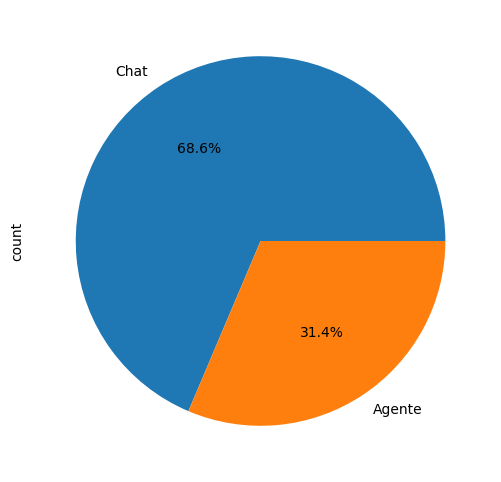

In [110]:
# Create the table
data = {
    'Tipo de Resolución': tipo_resolucion_counts.index.tolist() + ['Total'],
    'Frecuencia': tipo_resolucion_counts.values.tolist() + [tipo_resolucion_counts.sum()],
    'Proporción': tipo_resolucion_proportions.values.tolist() + [tipo_resolucion_proportions.sum()]
}
table = pd.DataFrame(data)

# Display the table
print(table)

# Visualiza la distribución con un gráfico de pie
tipo_resolucion_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6))

# Conclusiones análisis univariado

## Distribución de la Resolución de Chats:

68.6% de las consultas fueron resueltas completamente por el bot.

31.4% de las interacciones necesitaron la intervención de un agente humano.

Esto indica que el bot está manejando más de dos tercios de las consultas sin necesidad de escalamiento.

## Implicaciones del análisis:

El bot es funcional, pero aún hay una cantidad significativa de usuarios (31.4%) que necesitan un agente.

Si el objetivo es reducir la carga en los agentes humanos, habría que analizar qué tipo de consultas son más difíciles para el bot, sin embargo, para este modelo no es posible extraer la razón de la consulta del usuario por lo tanto se va a análizar de acuerdo al tipo de usuario y fecha.



# Análisis Bivariado

## Selección de variables

Las variables que se escogerán para el análisis Bivariado serám: **Tipo de resolución"** y **Audiencia**

## Razones para seleccionar estas variables:
1. Cada tipo de usuario puede tener necesidades distintas. Un aspirante podría hacer preguntas diferentes a las de un profesor.

  ¿Algunos tipos de usuarios necesitan más ayuda humana que otros?
2. Optimización del servicio de atención

  Si ciertos grupos (ej. profesores o colaboradores) requieren más agentes, se pueden diseñar respuestas automáticas específicas para mejorar la eficiencia del bot.

  ¿El bot resuelve bien consultas de estudiantes pero falla con profesores?
3. Identificación de mejoras en el bot

  Si un grupo específico de usuarios solicita más agentes, se pueden detectar patrones en las consultas que ese grupo realiza.

  ¿Qué ajustes en el bot pueden mejorar su tasa de resolución para cada tipo de usuario?

In [115]:
# Tabla de contingencia Audiencia vs Tipo de Resolución

# Group data by 'Audiencia' and 'Tipo de resolución', then count occurrences
resolution_by_audience = df.groupby(['Audiencia', 'Tipo de resolución']).size().unstack(fill_value=0)

# Calculate the proportion of each resolution type for each audience
resolution_by_audience['Total'] = resolution_by_audience.sum(axis=1)
resolution_by_audience['Proporción Agente'] = resolution_by_audience['Agente'] / resolution_by_audience['Total']

# Sort the table by the proportion of 'Agente' resolution in descending order
resolution_by_audience = resolution_by_audience.sort_values('Proporción Agente', ascending=False)

print("Tabla de contingencia Audiencia vs Tipo de Resolución")
# Display the table
resolution_by_audience


Tabla de contingencia Audiencia vs Tipo de Resolución


Tipo de resolución,Agente,Chat,Total,Proporción Agente
Audiencia,,,,
profesor,1423,1430,2853,0.498773
colaborador,643,687,1330,0.483459
estudiante,7099,10764,17863,0.397414
graduado,910,1420,2330,0.390558
Sin identificar,240,1417,1657,0.144840
aspirante,710,8386,9096,0.078056
